In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy
from scipy import stats
from statsmodels.api import add_constant
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data=pd.read_csv("LGD_DATA.csv")
data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [5]:
newdata=pd.get_dummies(data,drop_first=True) # drop first Categorical data and create dummy variable
newdata.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [6]:
del(newdata["Ac_No"])


In [7]:
df=newdata

In [8]:
#Decide your regressor and predictor
x=df[["Age","Number of Vehicles","Gender_M","Married_Single"]] # Not taking Years of Experience because they have a correlation of 1 
y=df["Losses in Thousands"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) # test size is for proportion
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)

539.6565230110673
[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]


In [10]:
pred1=lm.predict(x_test)
pred1


array([534.92615816, 495.96502648, 397.21599832, ..., 240.92300027,
       437.69122548, 321.5015043 ])

In [11]:
r2_score(y_test,pred1) # find the accuracy if it is performing well or not 

0.29505257544943864

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


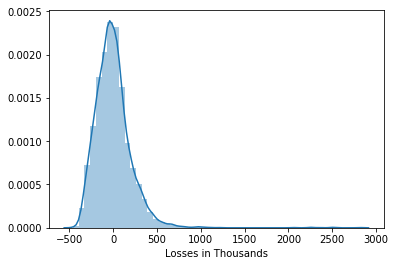

In [21]:
error=y_test-pred1                  

sns.distplot(error,kde = True)  # Error should follow a normal distribution
plt.show()

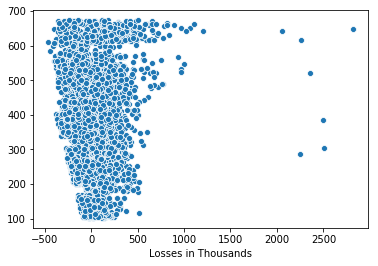

In [26]:

sns.scatterplot(error,pred1)     # errors should have a constant variance
plt.show()

In [27]:
sse=sum((y_test-pred1)**2)
sse


207618480.25806

In [ ]:
tss=sum((y_test-np.mean(y_train))**2)
tss

In [ ]:
r2=1-(sse/tss)
r2

In [ ]:
pred=lm.predict(x_train)
pred

In [ ]:
r2_score(y_train,pred) # r2 for training data

In [ ]:
mape=np.mean(abs((pred1-y_test)/y_test))
mape

In [ ]:
mape=np.mean(abs((pred-y_train)/y_train))
mape

In [ ]:
k=16
p=0.5
n=20
binomial =1 - stats.binom.cdf(k,n,p)
print(binomial)

In [28]:
from statsmodels.api import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues


const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
Gender_M              1.470589e-121
Married_Single        6.953054e-233
dtype: float64

In [29]:

print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                         11:10:44   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [30]:
data=pd.read_csv("wine.csv")
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [31]:
data.nunique()

Year           25
Price          25
WinterRain     24
AGST           23
HarvestRain    24
Age            25
FrancePop      25
dtype: int64

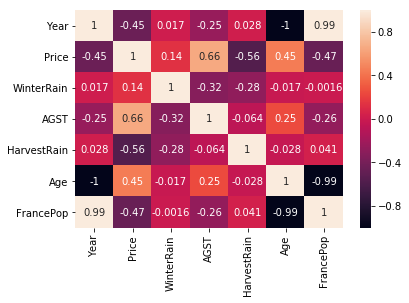

In [32]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# drop year beacuse they have a -1 correlation
del(data["Year"])


In [ ]:
del(data["FrancePop"])

In [ ]:
data.head()

In [33]:
lm=LinearRegression()
x=pd.DataFrame(data.iloc[:,[1,2,3,4]])
y=data.Price
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

-1.509903313490213e-14
[ 1.00000000e+00 -2.99283634e-18  4.03495266e-16  1.27101871e-17]


In [ ]:

#lets get the P values of each predictors
X2 = add_constant(x)   # gives y Intercept
lm= sm.OLS(y,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

In [ ]:

print(lm2.summary())

In [34]:
x=data.iloc[:,[1,3,4]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [35]:
vif

,VIF Factor,features
0,398.243684,Price
1,484.002427,AGST
2,9.938540,HarvestRain


# Home Assignment 

In [ ]:
df1=pd.read_csv("Housetrain.csv")
df2=pd.read_csv("Housetest.csv")

In [ ]:
df1.shape

In [ ]:
df2.shape

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df=pd.concat([df1,df2],axis=0,sort=False)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe(include="all")

In [ ]:
df.nunique()